In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import os
import glob
from natsort import natsorted

In [22]:
Nx = 1000
x1 = -20.0
x2 = 20
X  = np.linspace(x1,x2,num=Nx, dtype=np.float32)

In [23]:
loss_real = np.loadtxt('./GL_NN/output_real.dat',unpack = True)
loss_img = np.loadtxt('./GL_NN/output_img.dat',unpack = True)

Text(0, 0.5, 'Loss')

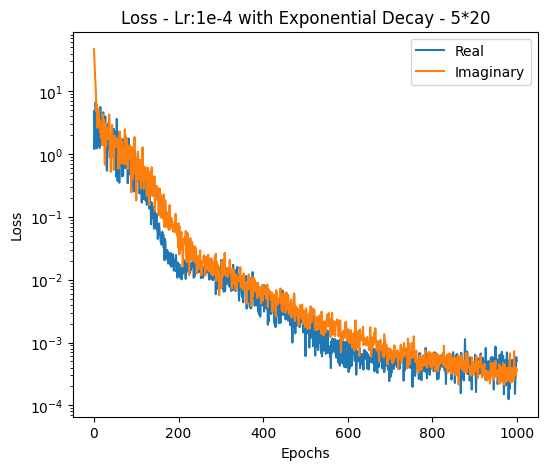

In [24]:
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111)

ax.set_yscale('log')

# Surface Plot

ax.plot(loss_real[0],loss_real[1])
ax.plot(loss_img[0],loss_img[1])

ax.legend(['Real', 'Imaginary'])

# Labels
plt.title("Loss - Lr:1e-4 with Exponential Decay - 5*20")
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')

In [25]:
u = np.load("./GL_NN/U",allow_pickle=True)
v = np.load("./GL_NN/V",allow_pickle=True)

In [26]:
u[500:]

array([ 9.90828753e-01,  9.88217294e-01,  9.82861519e-01,  9.74768043e-01,
        9.63951707e-01,  9.50437307e-01,  9.34262991e-01,  9.15483713e-01,
        8.94175887e-01,  8.70440543e-01,  8.44407499e-01,  8.16238403e-01,
        7.86128461e-01,  7.54305482e-01,  7.21028507e-01,  6.86584592e-01,
        6.51280582e-01,  6.15436971e-01,  5.79377711e-01,  5.43421090e-01,
        5.07870376e-01,  4.73005712e-01,  4.39075917e-01,  4.06295389e-01,
        3.74839693e-01,  3.44846249e-01,  3.16412777e-01,  2.89602488e-01,
        2.64446020e-01,  2.40945816e-01,  2.19080389e-01,  1.98809549e-01,
        1.80077195e-01,  1.62816972e-01,  1.46953866e-01,  1.32408947e-01,
        1.19100004e-01,  1.06944650e-01,  9.58612263e-02,  8.57706964e-02,
        7.65968859e-02,  6.82667494e-02,  6.07122816e-02,  5.38684465e-02,
        4.76752855e-02,  4.20765616e-02,  3.70202698e-02,  3.24592330e-02,
        2.83485390e-02,  2.46479549e-02,  2.13199593e-02,  1.83315016e-02,
        1.56505145e-02,  

Text(0, 0.5, 'Value')

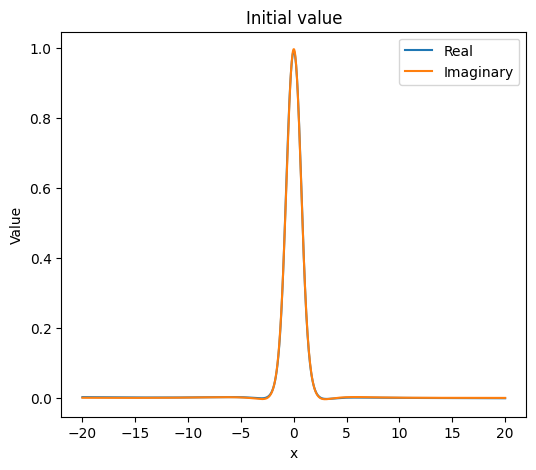

In [27]:
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111)

# Surface Plot

ax.plot(X,u)
ax.plot(X,v)

ax.legend(['Real', 'Imaginary'])

# Labels
plt.title("Initial value")
ax.set_xlabel('x')
ax.set_ylabel('Value')

In [43]:
u_list = natsorted(glob.glob('./GL_NN/U*'))
v_list = natsorted(glob.glob('./GL_NN/V*'))

x_list = natsorted(glob.glob('./GL_NN/X*'))

In [44]:
u_list

['./GL_NN/U',
 './GL_NN/U1',
 './GL_NN/U2',
 './GL_NN/U3',
 './GL_NN/U4',
 './GL_NN/U5',
 './GL_NN/U6',
 './GL_NN/U7',
 './GL_NN/U8',
 './GL_NN/U9',
 './GL_NN/U10',
 './GL_NN/U11',
 './GL_NN/U12',
 './GL_NN/U13',
 './GL_NN/U14',
 './GL_NN/U15',
 './GL_NN/U16',
 './GL_NN/U17',
 './GL_NN/U18',
 './GL_NN/U19',
 './GL_NN/U20',
 './GL_NN/U21',
 './GL_NN/U22',
 './GL_NN/U23',
 './GL_NN/U24',
 './GL_NN/U25',
 './GL_NN/U26',
 './GL_NN/U27',
 './GL_NN/U28',
 './GL_NN/U29',
 './GL_NN/U30',
 './GL_NN/U31',
 './GL_NN/U32',
 './GL_NN/U33',
 './GL_NN/U34',
 './GL_NN/U35',
 './GL_NN/U36',
 './GL_NN/U37',
 './GL_NN/U38',
 './GL_NN/U39',
 './GL_NN/U40',
 './GL_NN/U41',
 './GL_NN/U42',
 './GL_NN/U43',
 './GL_NN/U44',
 './GL_NN/U45',
 './GL_NN/U46',
 './GL_NN/U47',
 './GL_NN/U48',
 './GL_NN/U49',
 './GL_NN/U50',
 './GL_NN/U51',
 './GL_NN/U52',
 './GL_NN/U53',
 './GL_NN/U54',
 './GL_NN/U55',
 './GL_NN/U56',
 './GL_NN/U57',
 './GL_NN/U58',
 './GL_NN/U59',
 './GL_NN/U60',
 './GL_NN/U61',
 './GL_NN/U62',
 '.

/var/folders/8j/7mx8fh612vn6fnsw42p34gd40000gp/T/ipykernel_1984/1726045066.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=(6,5))


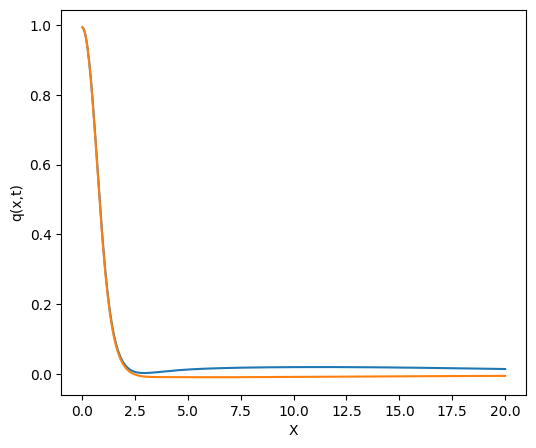

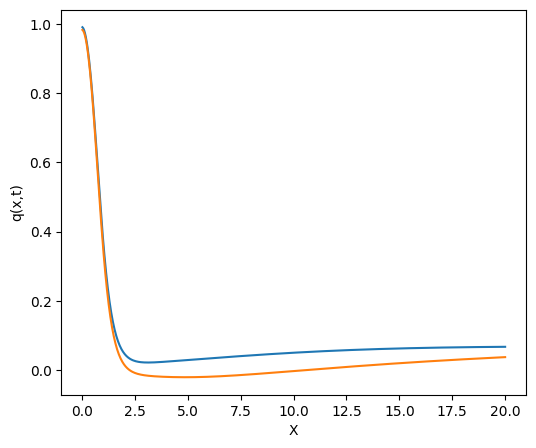

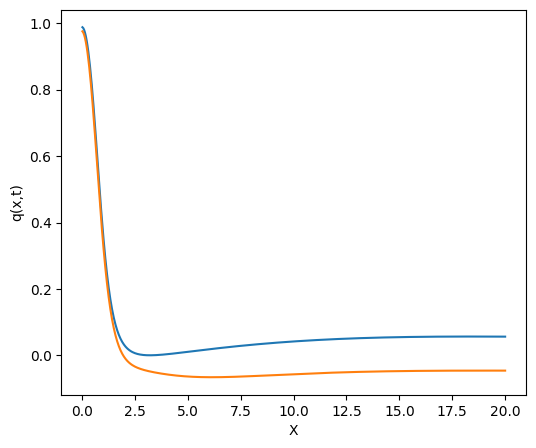

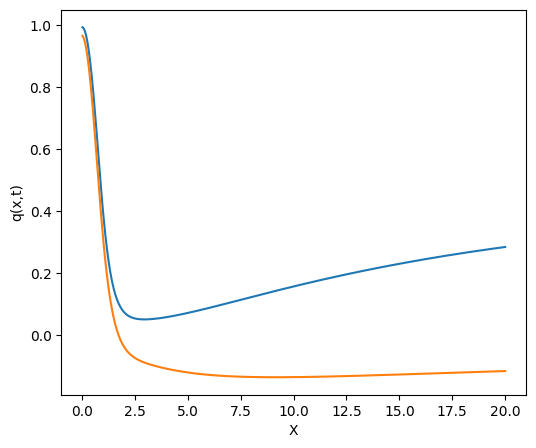

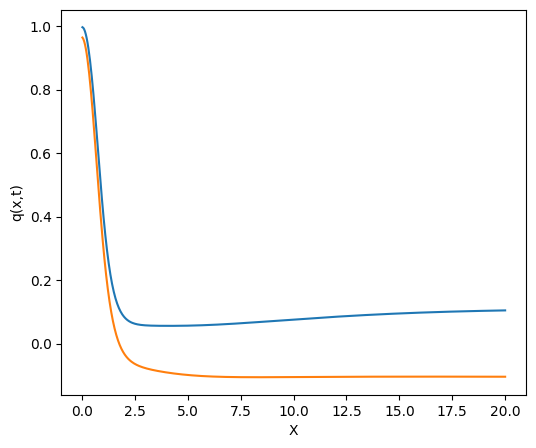

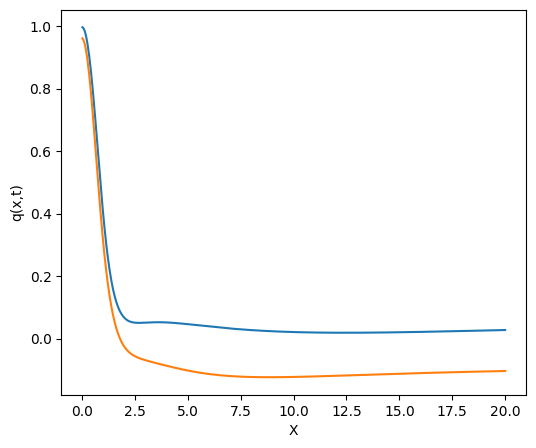

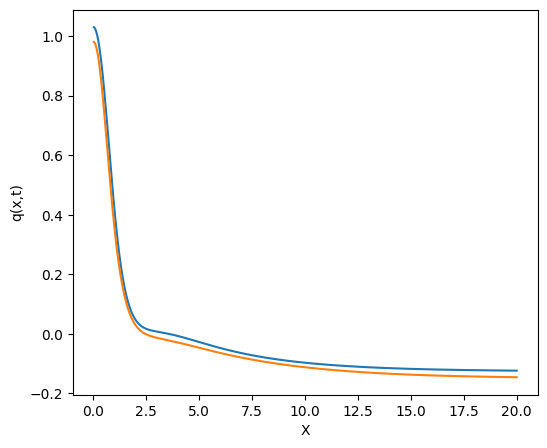

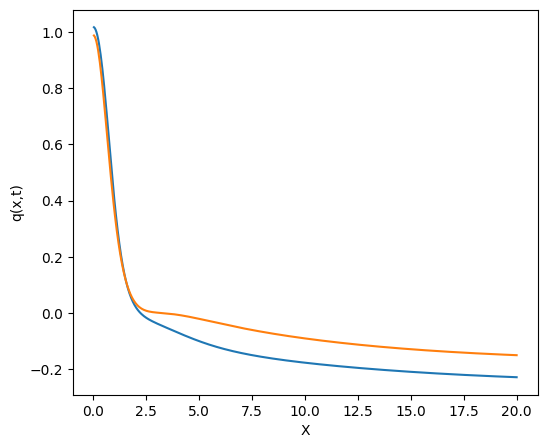

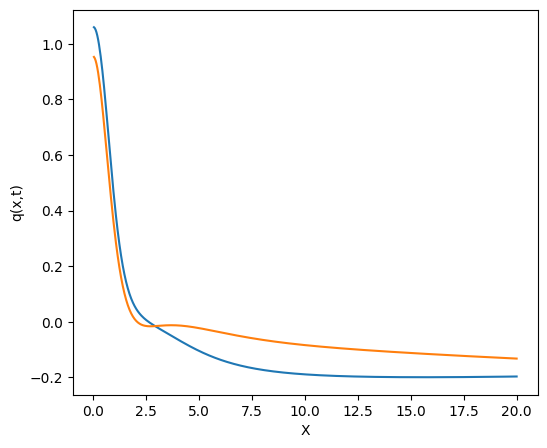

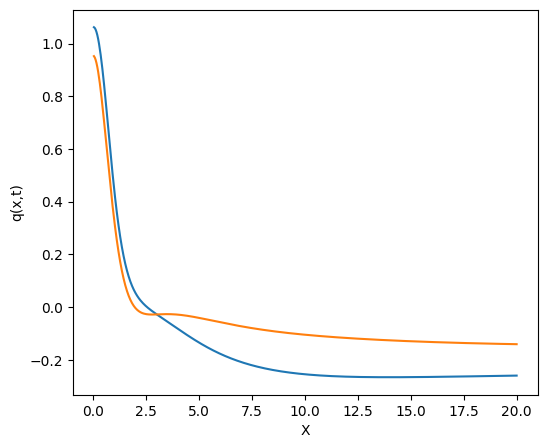

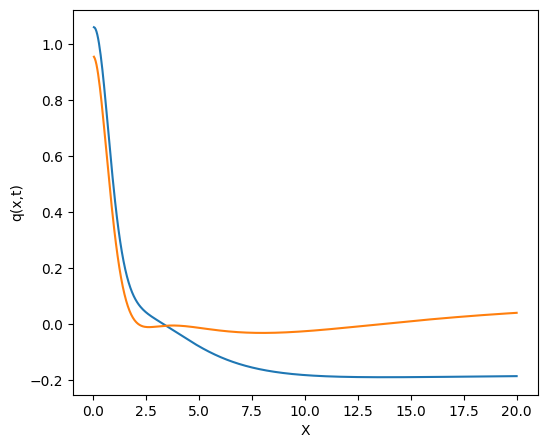

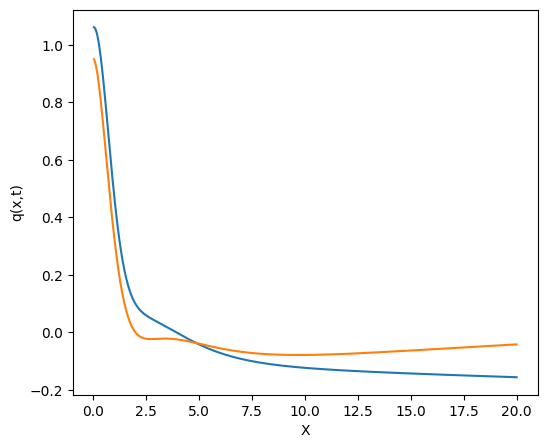

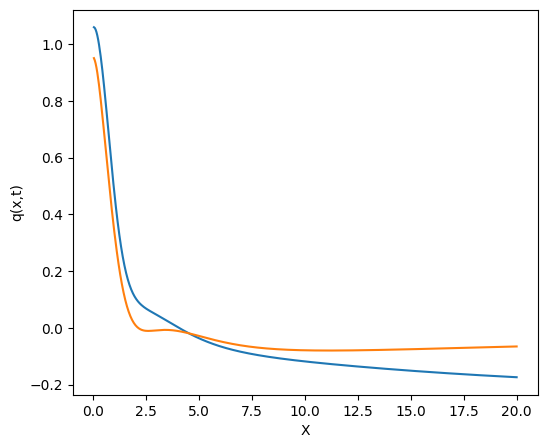

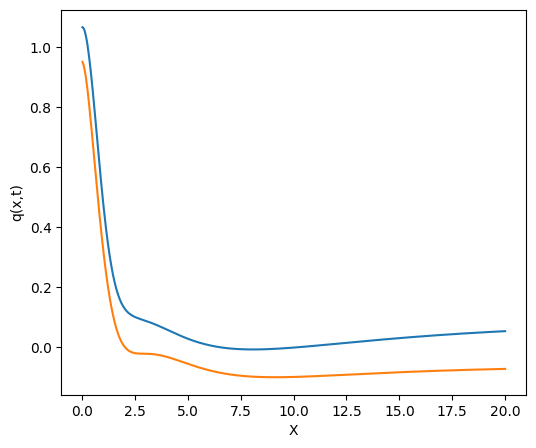

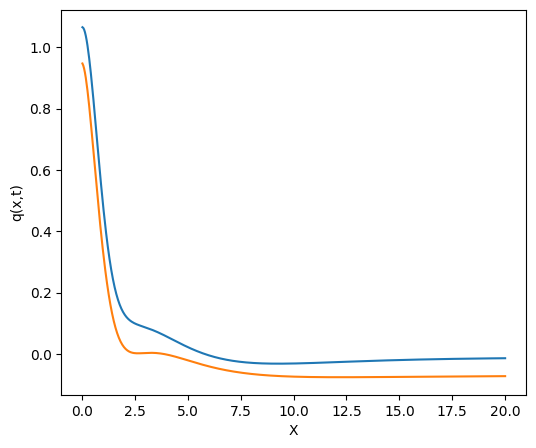

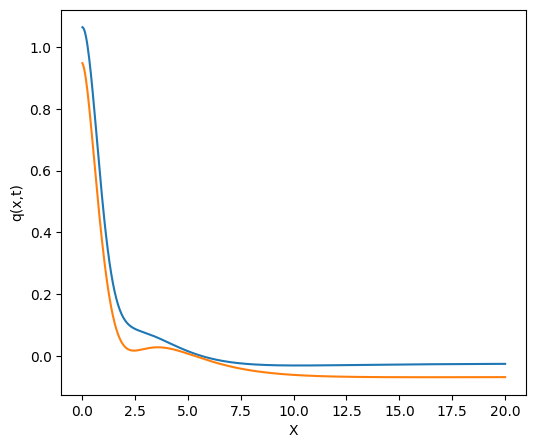

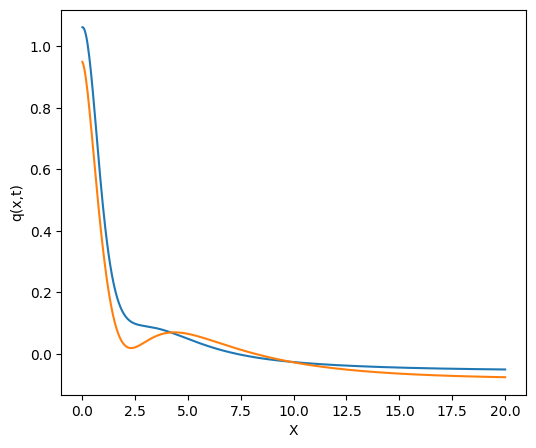

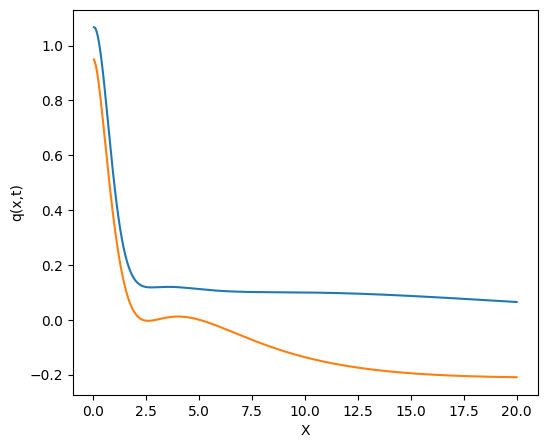

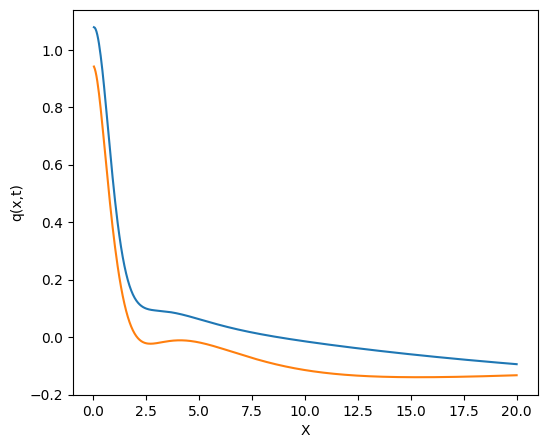

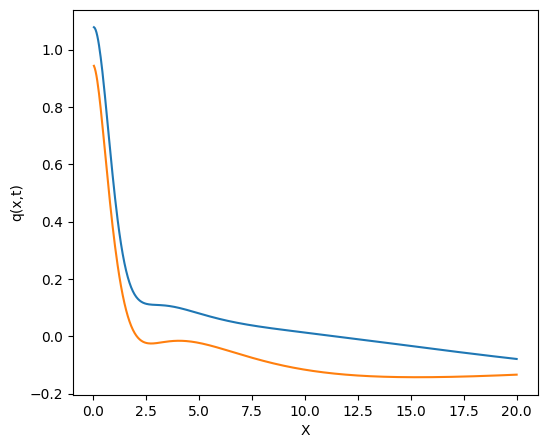

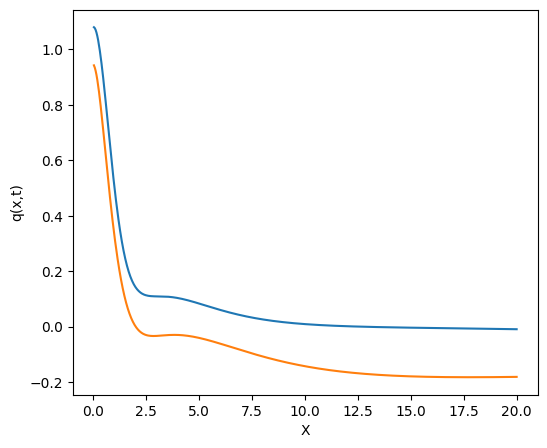

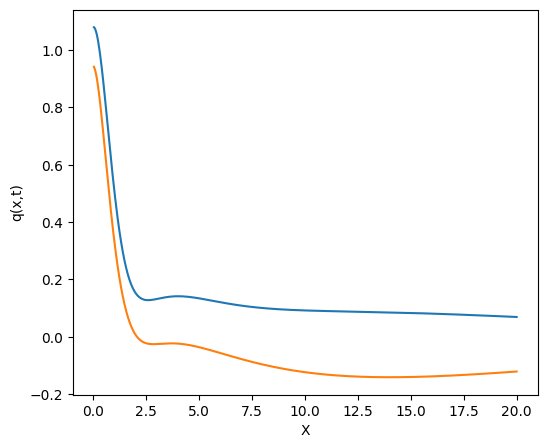

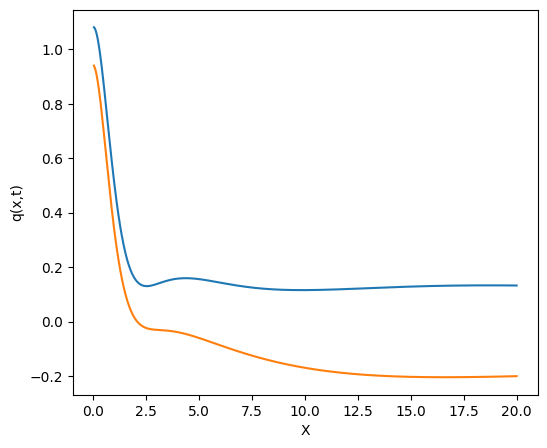

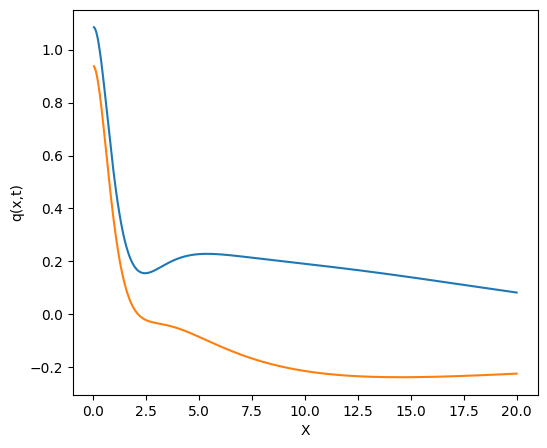

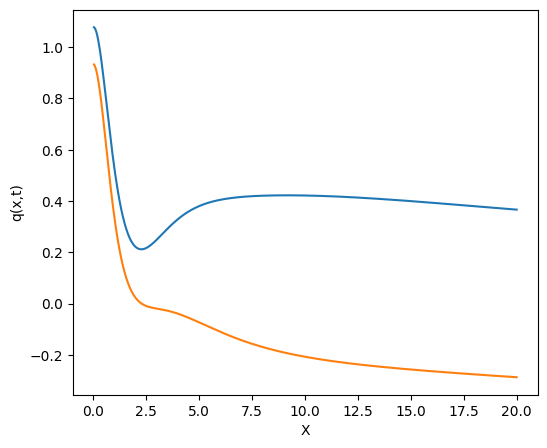

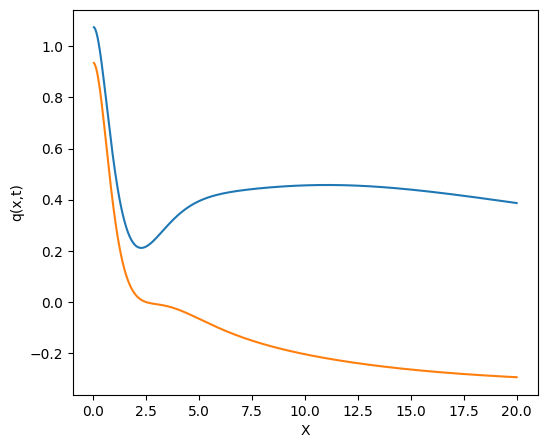

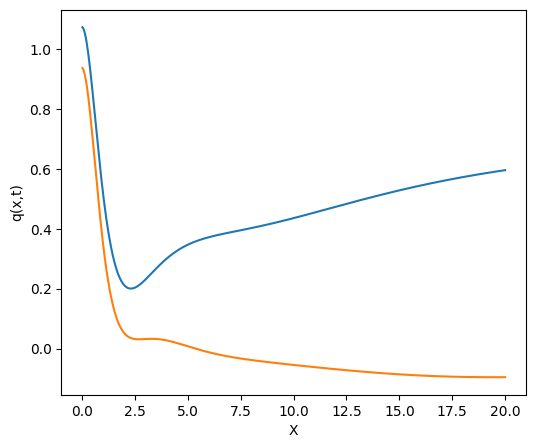

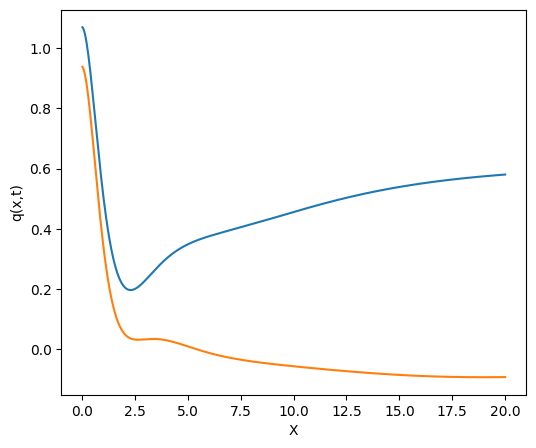

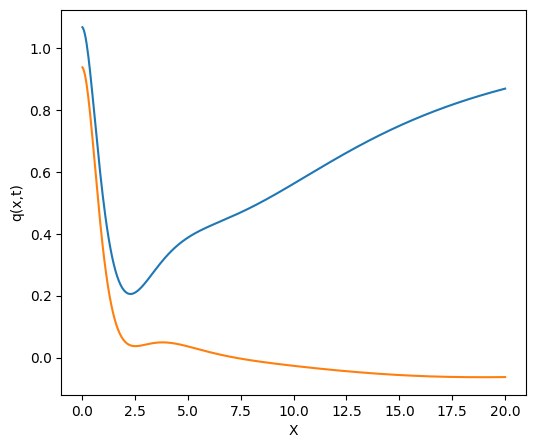

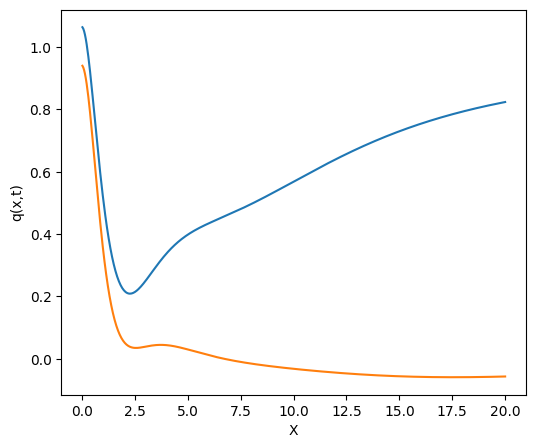

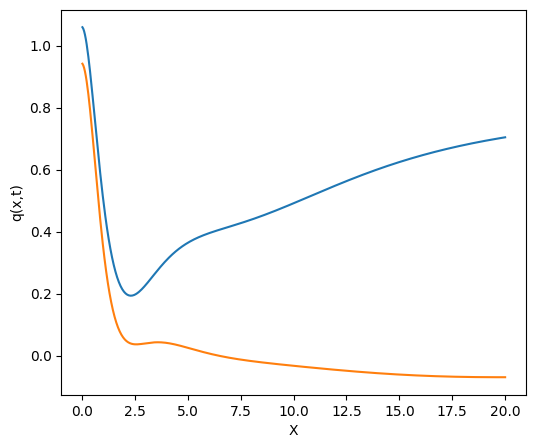

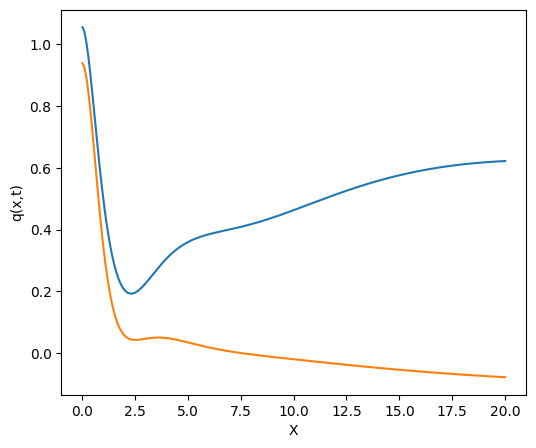

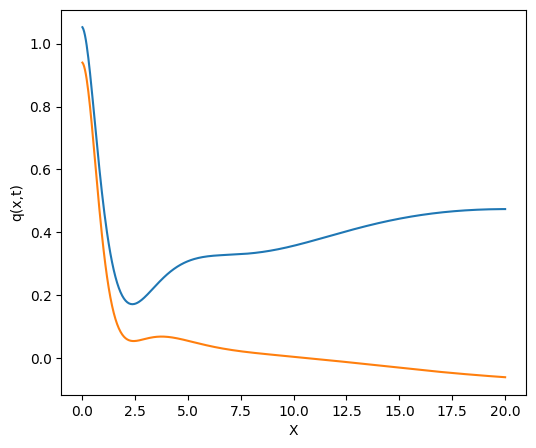

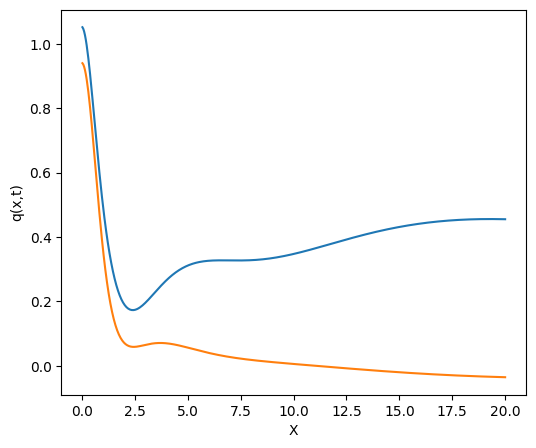

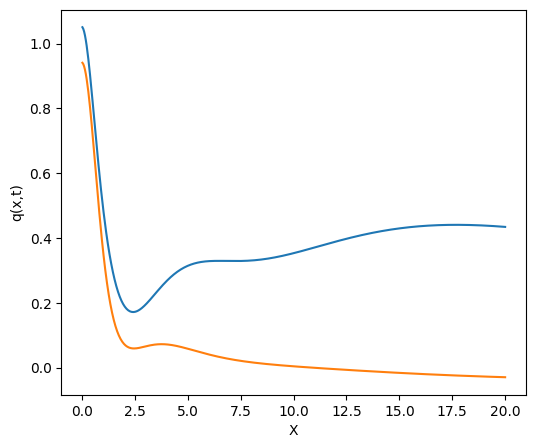

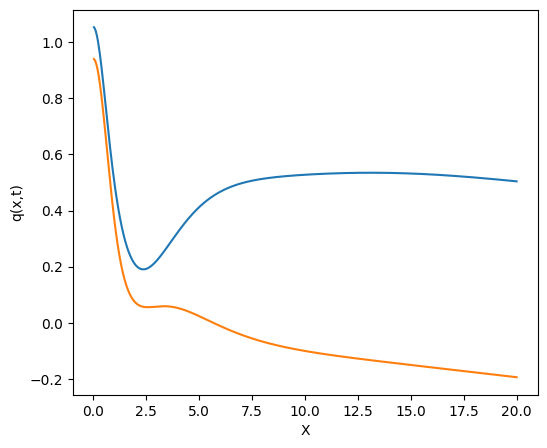

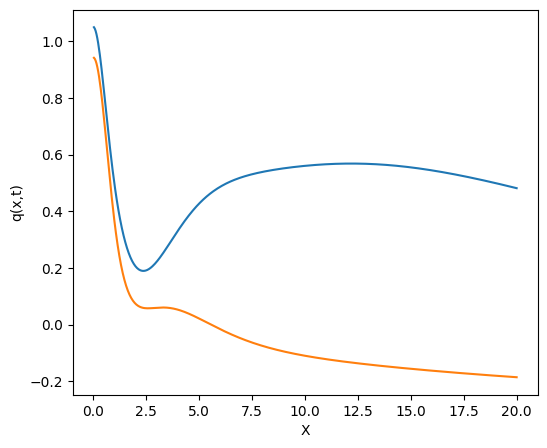

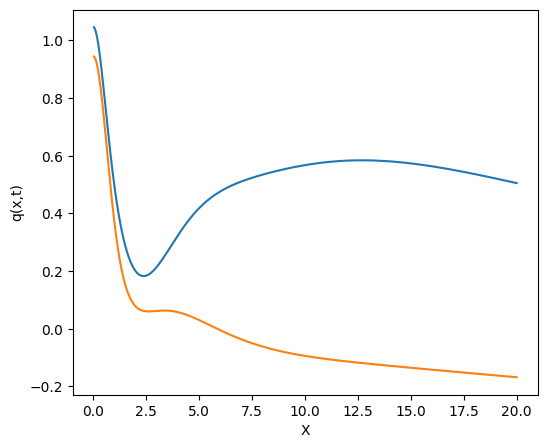

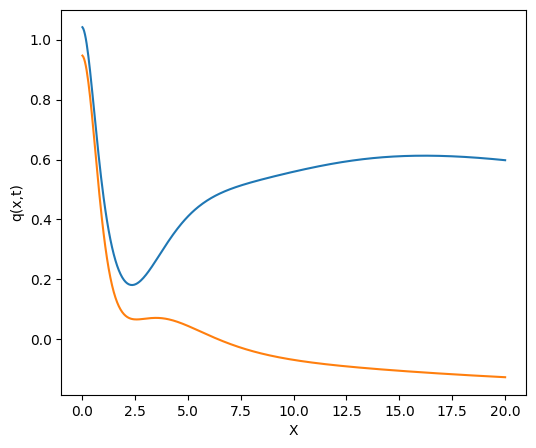

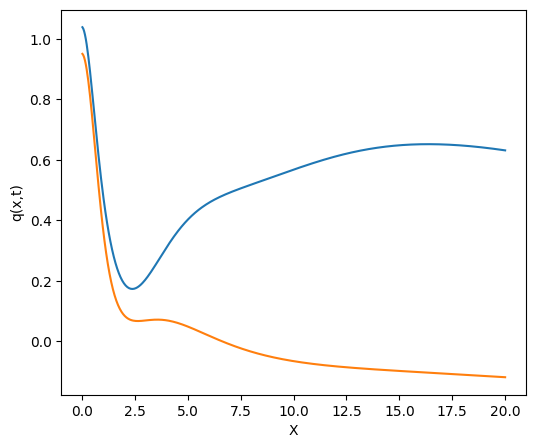

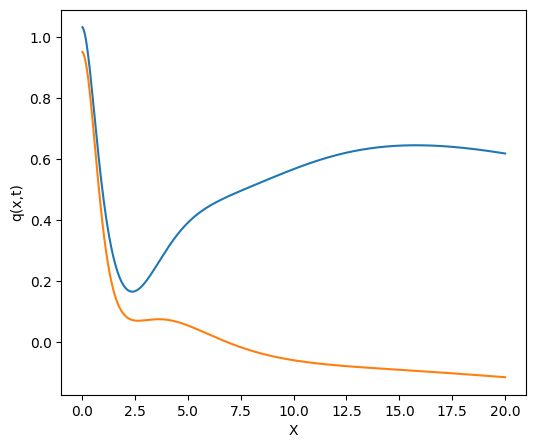

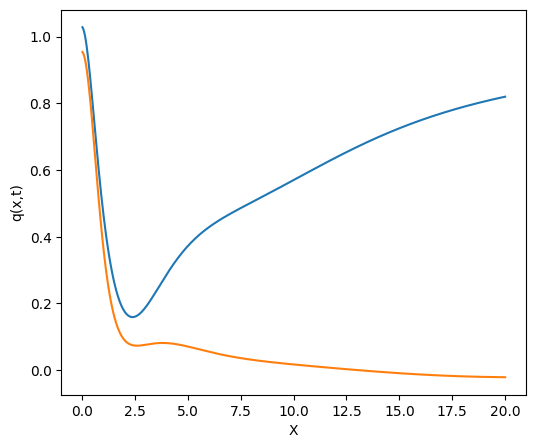

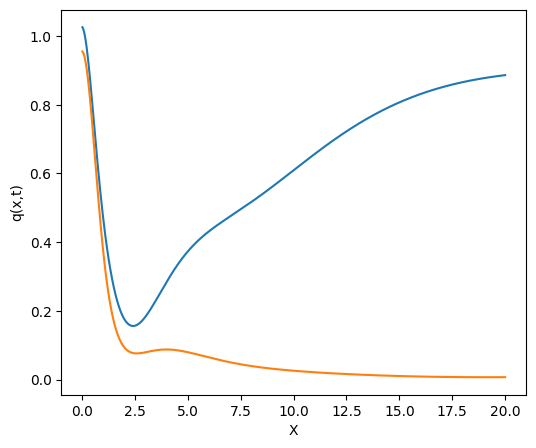

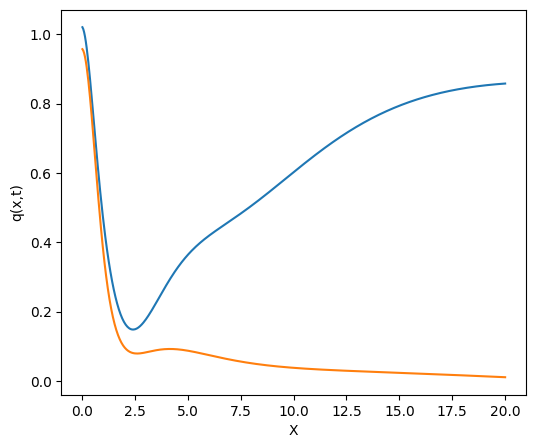

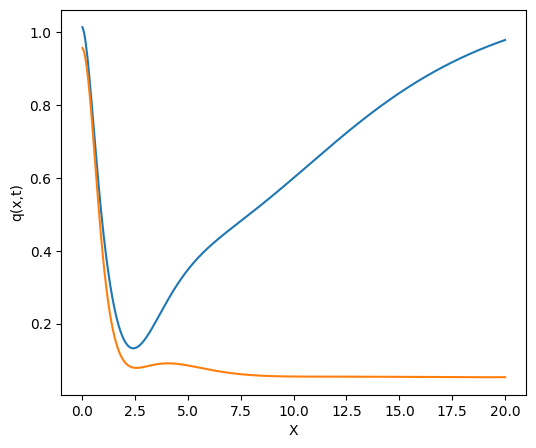

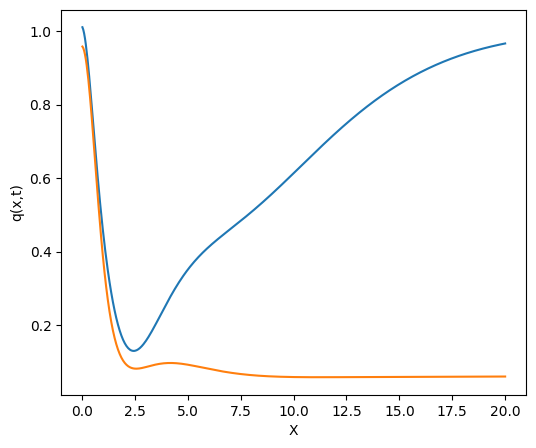

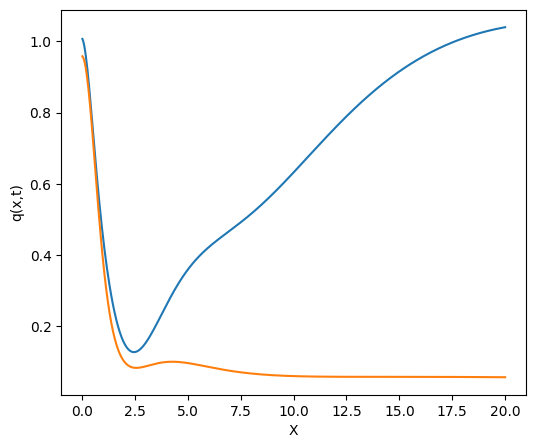

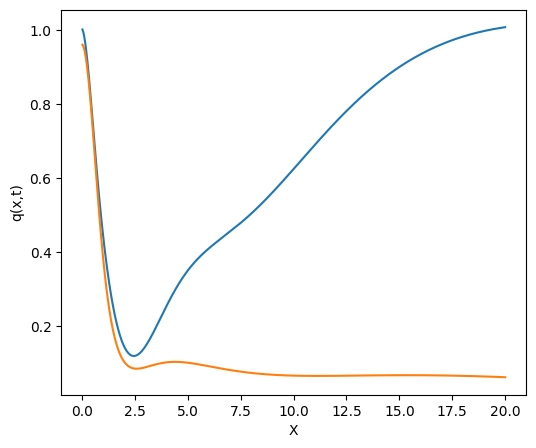

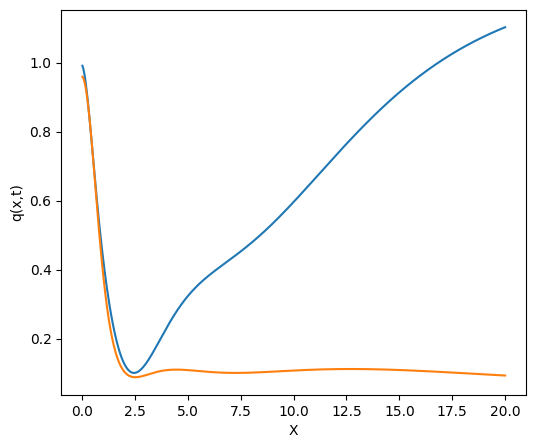

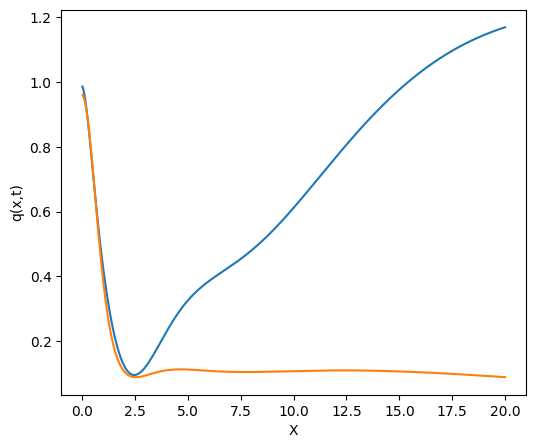

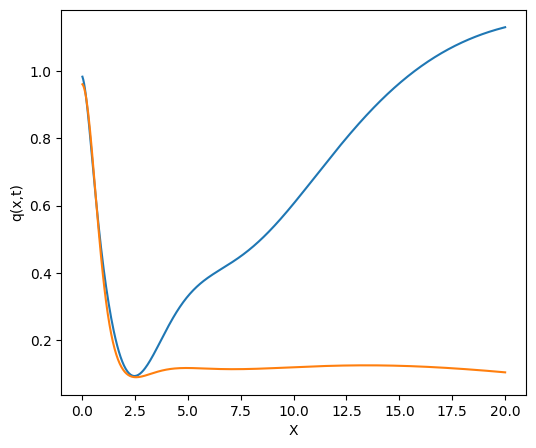

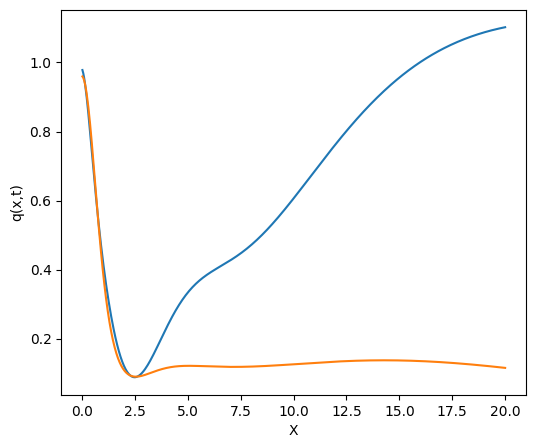

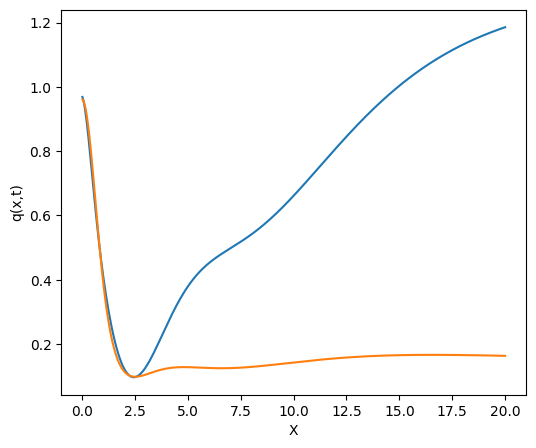

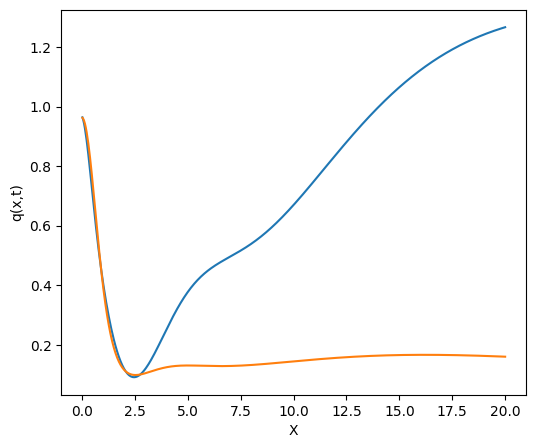

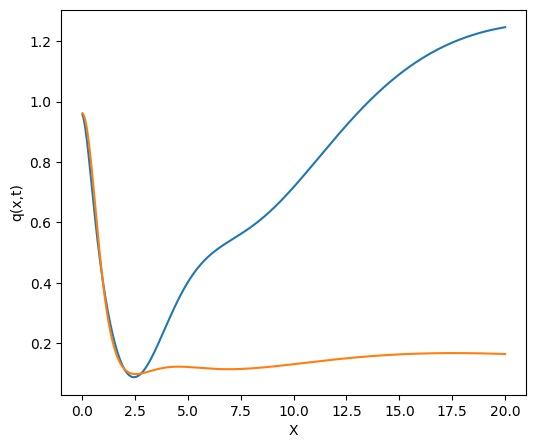

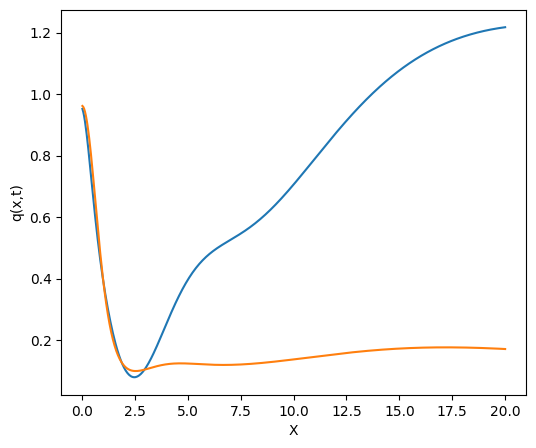

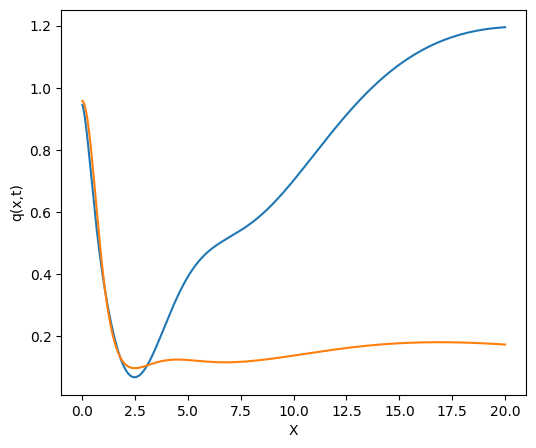

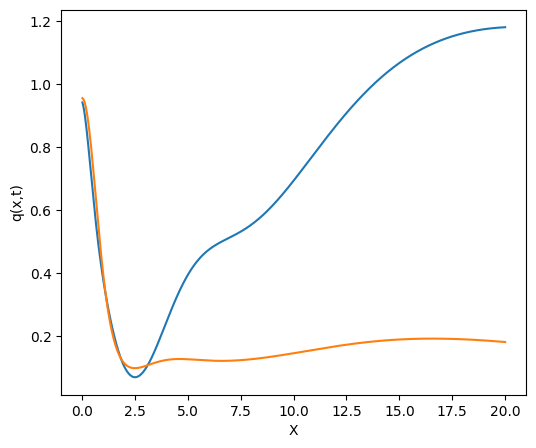

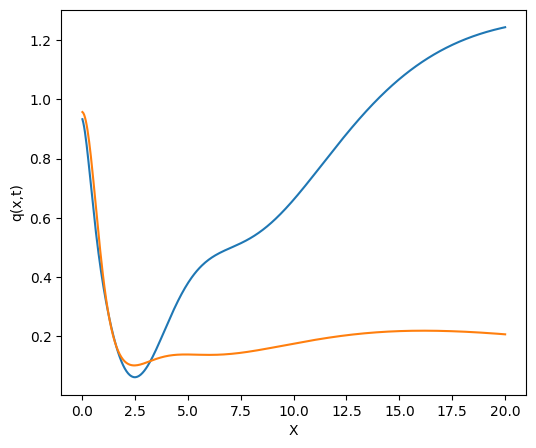

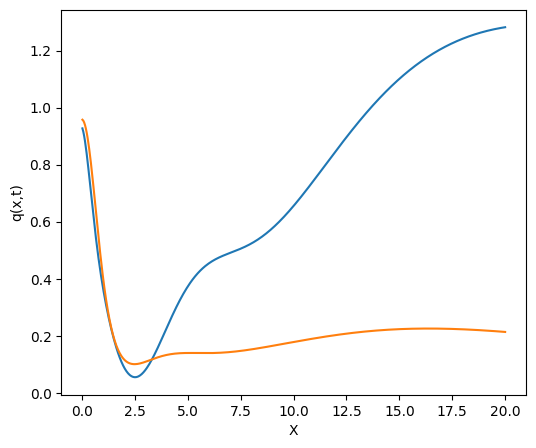

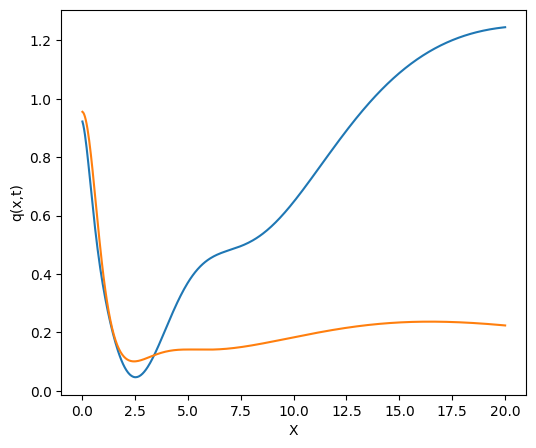

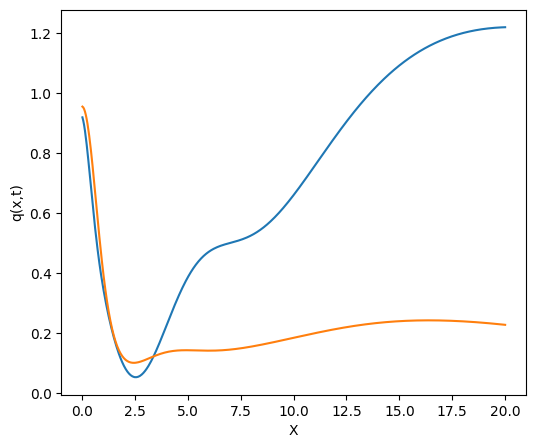

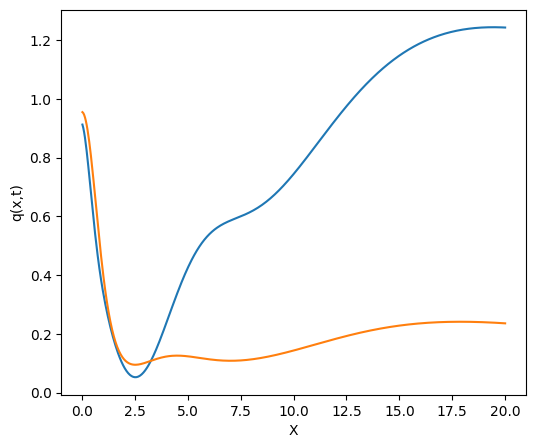

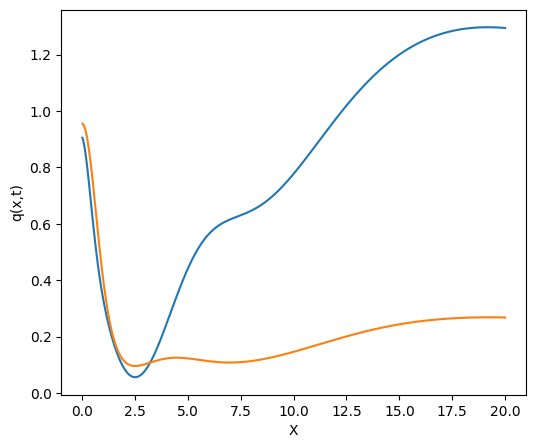

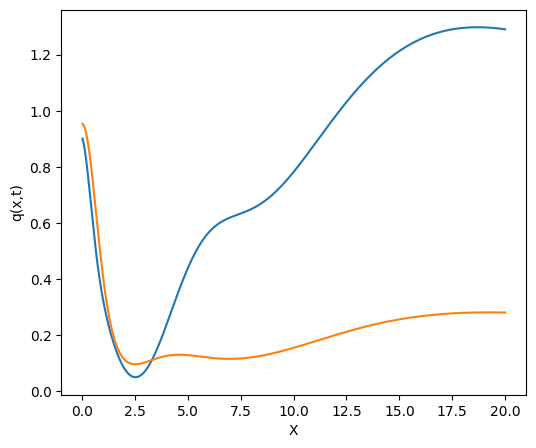

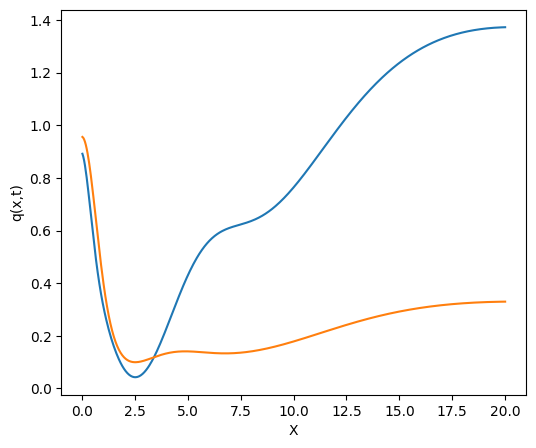

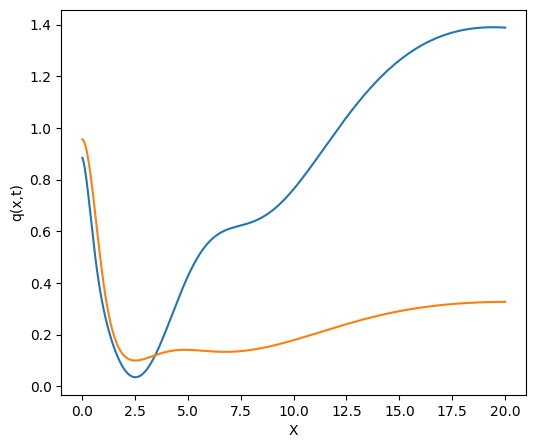

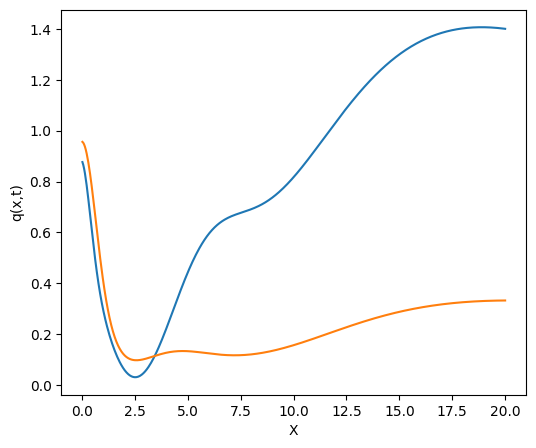

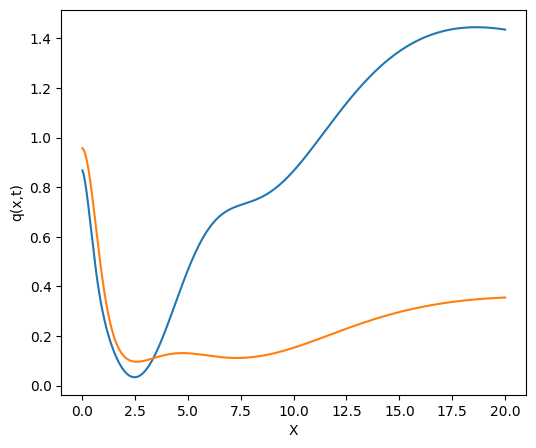

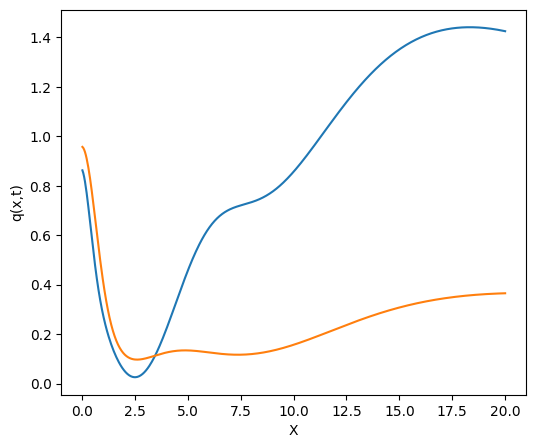

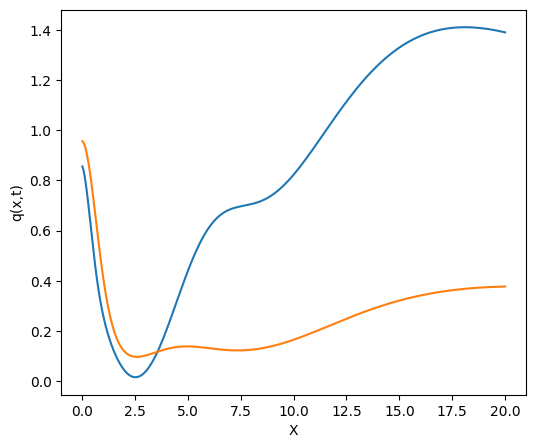

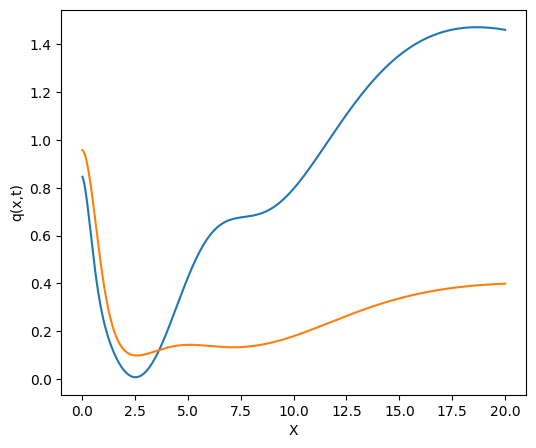

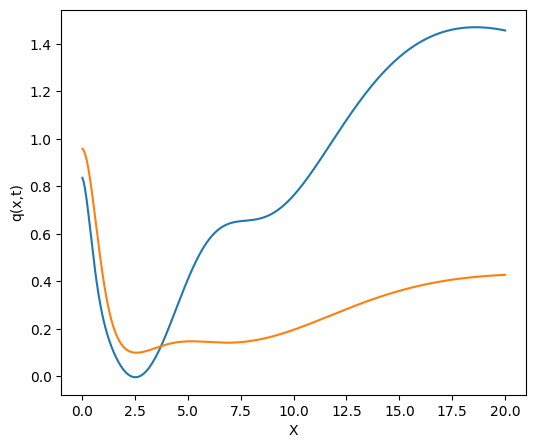

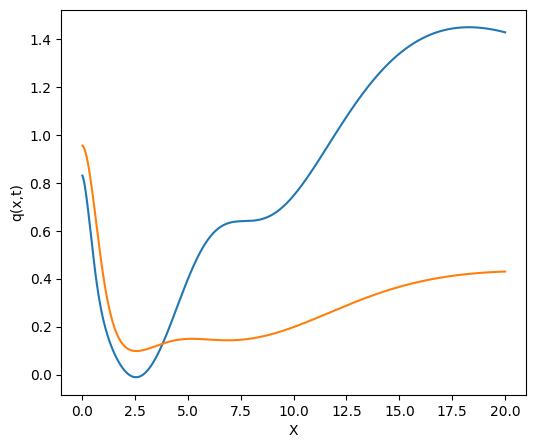

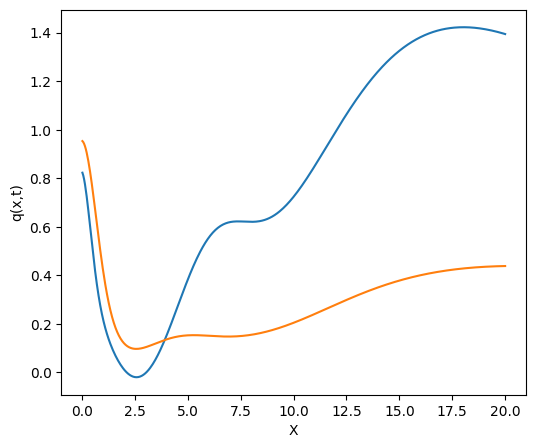

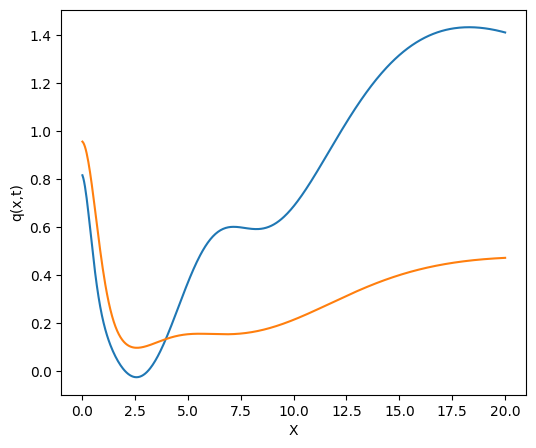

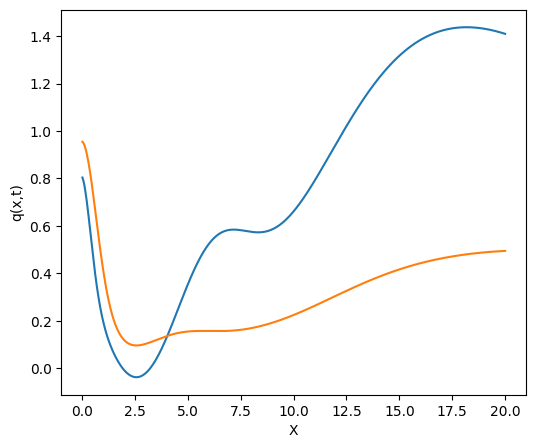

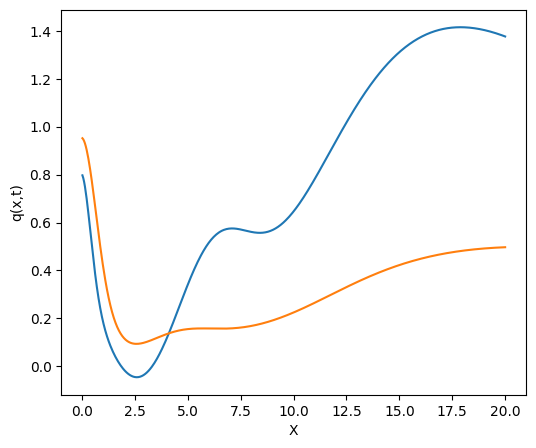

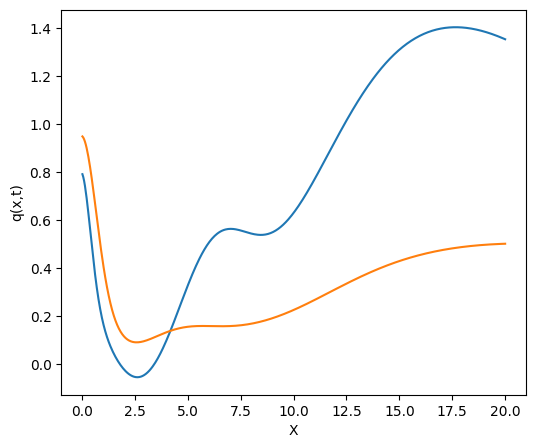

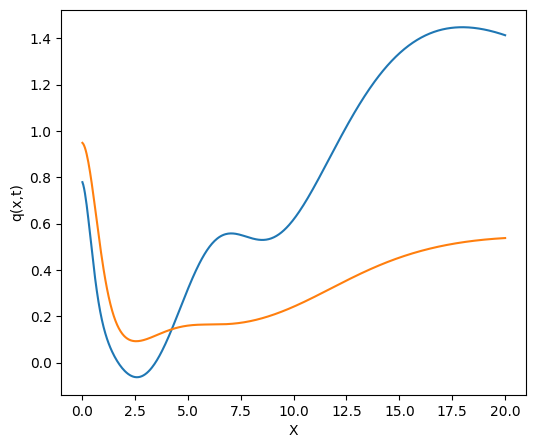

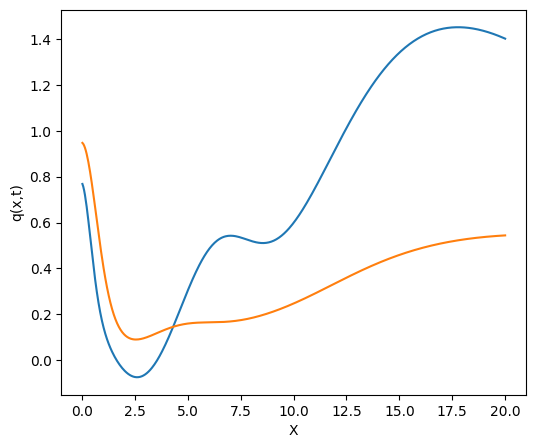

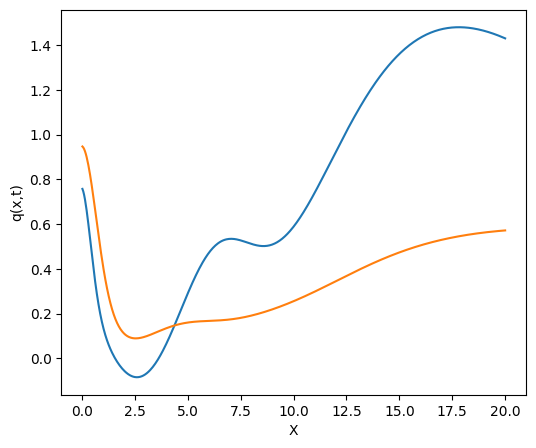

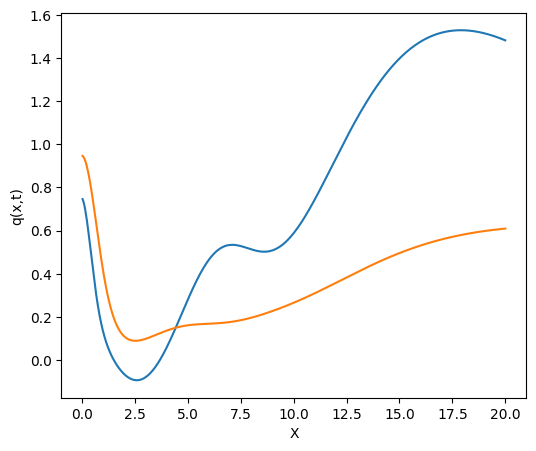

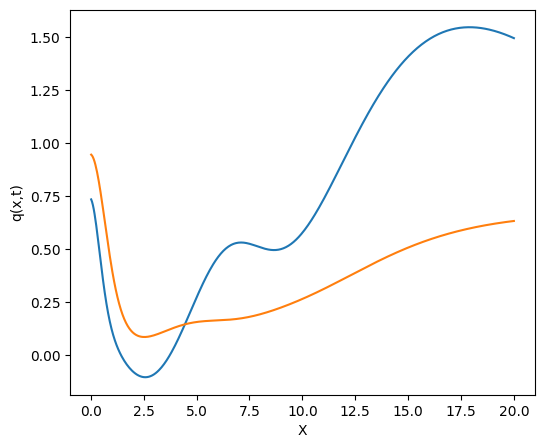

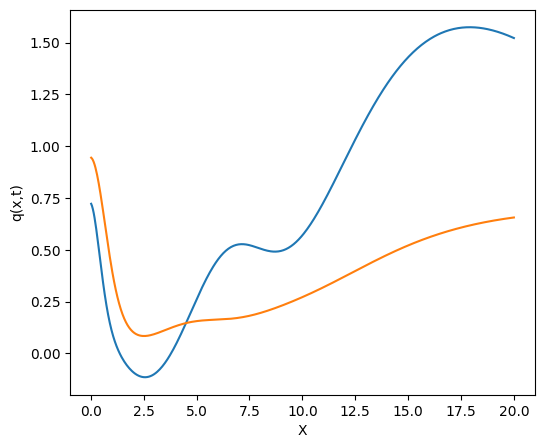

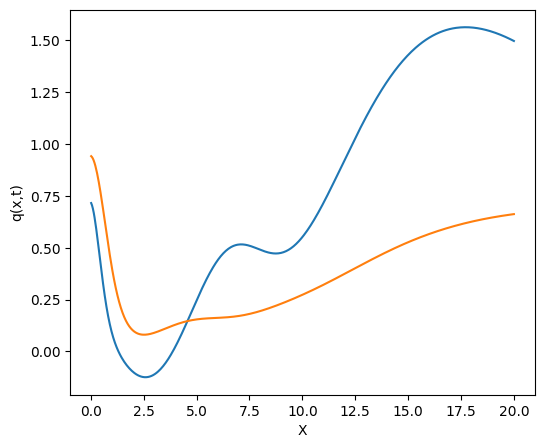

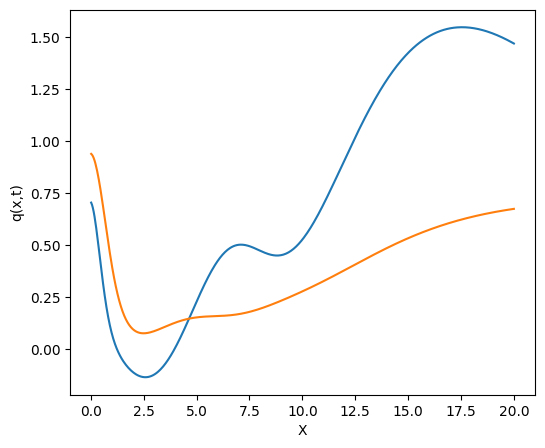

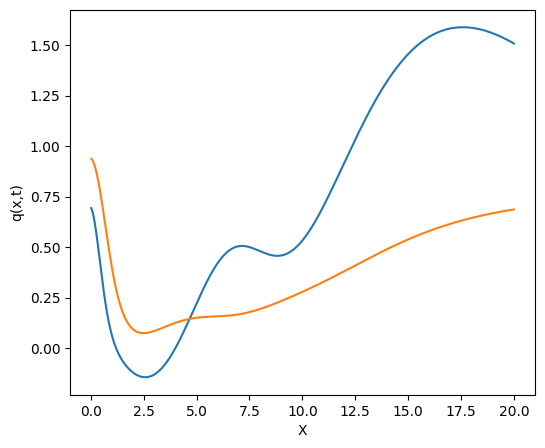

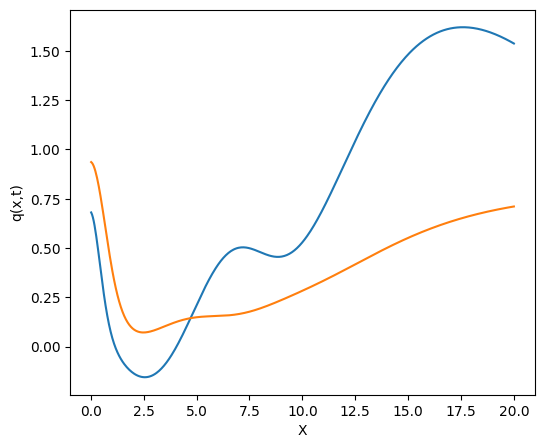

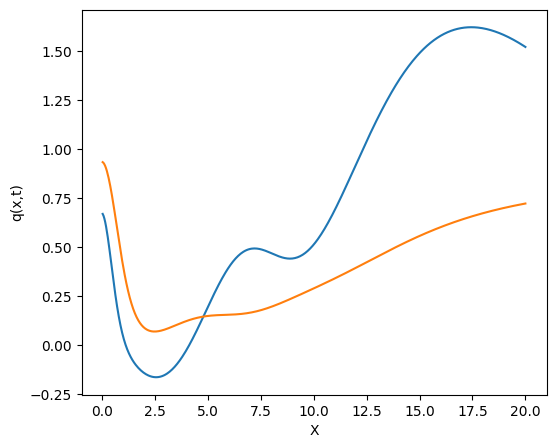

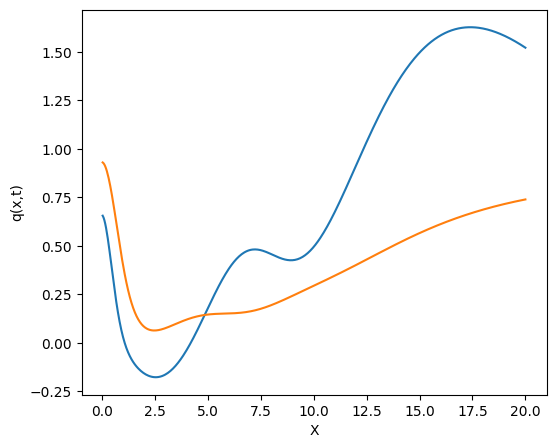

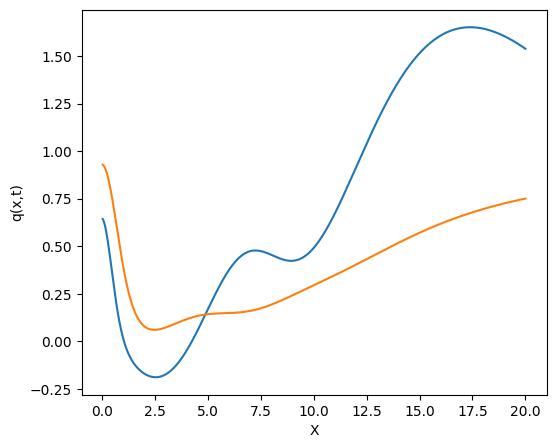

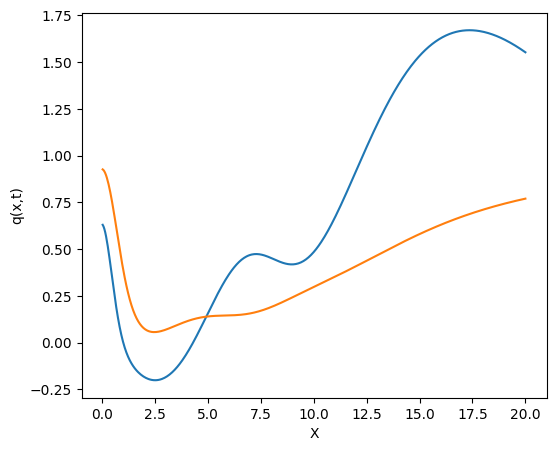

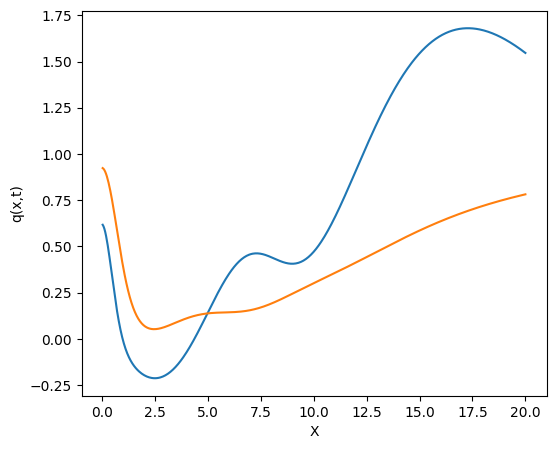

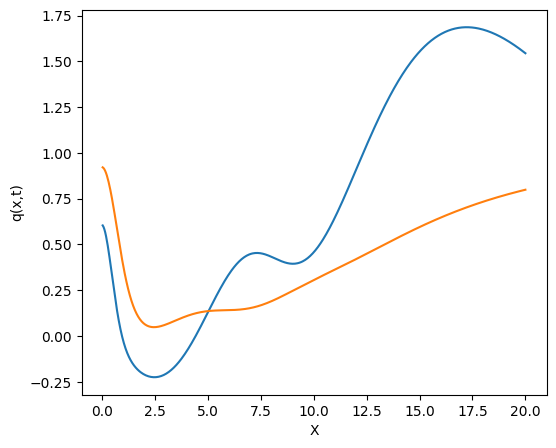

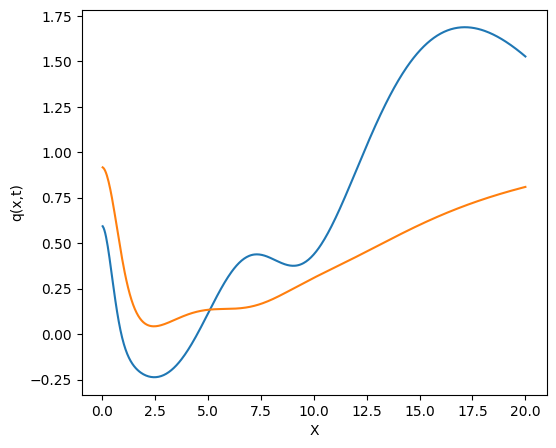

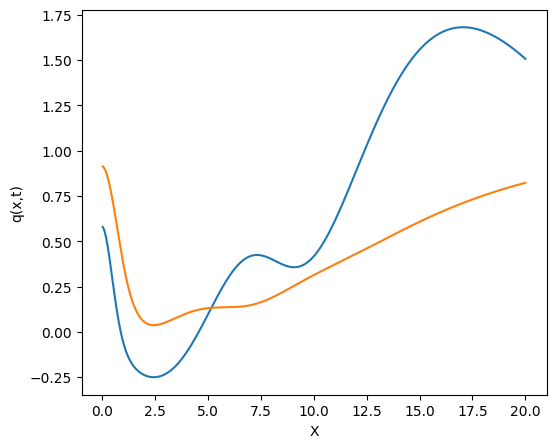

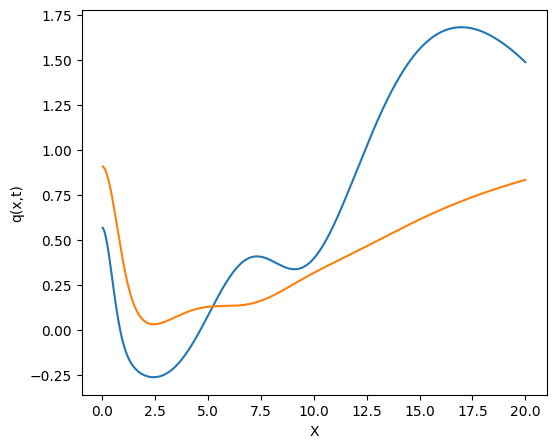

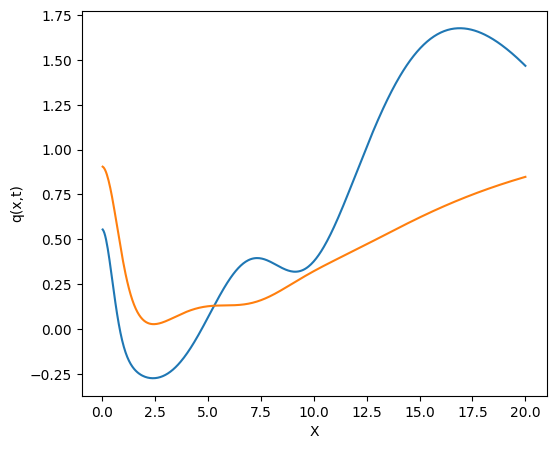

In [45]:
for i in range(1,len(u_list)):    
    x = np.load(x_list[i],allow_pickle=True)[500:]
    u = np.load(u_list[i],allow_pickle=True)[500:]
    v = np.load(v_list[i],allow_pickle=True)[500:]
    
    fig = plt.figure(figsize=(6,5))
    ax = fig.add_subplot(111)

    # Surface Plot

    ax.plot(x, u)
    ax.plot(x, v)

    # Labels

    ax.set_xlabel('X')
    ax.set_ylabel('q(x,t)')
    
    # Save
    #plt.savefig(f'q_{i}.png')
    #plt.cla()